<a href="https://colab.research.google.com/github/waelrash1/time_series_forecasting_dt302-2/blob/main/Arima%20Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load necessary library
library(tidyverse) #for data manipulation and visualization
library(lubridate) #for datetime data
library(stringr) #for string data
library(forecast) #for time series prediction
#Install packages 
# install.packages("forecast")

In [ ]:
#set.seed(1)
#Load the Air Passengers’ Dataset and View Its Class
data("AirPassengers")

class(AirPassengers)

head(AirPassengers)



[1] "ts"

,Jan,Feb,Mar,Apr,May,Jun
1949,112,118,132,129,121,135


In [ ]:
start(AirPassengers)
end(AirPassengers)



[1] 1949    1

[1] 1960   12

In [ ]:
#Find out If There Are Any Missing Value  
sum(is.na(AirPassengers))

#Check the Summary of the Dataset
summary(AirPassengers)

[1] 0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

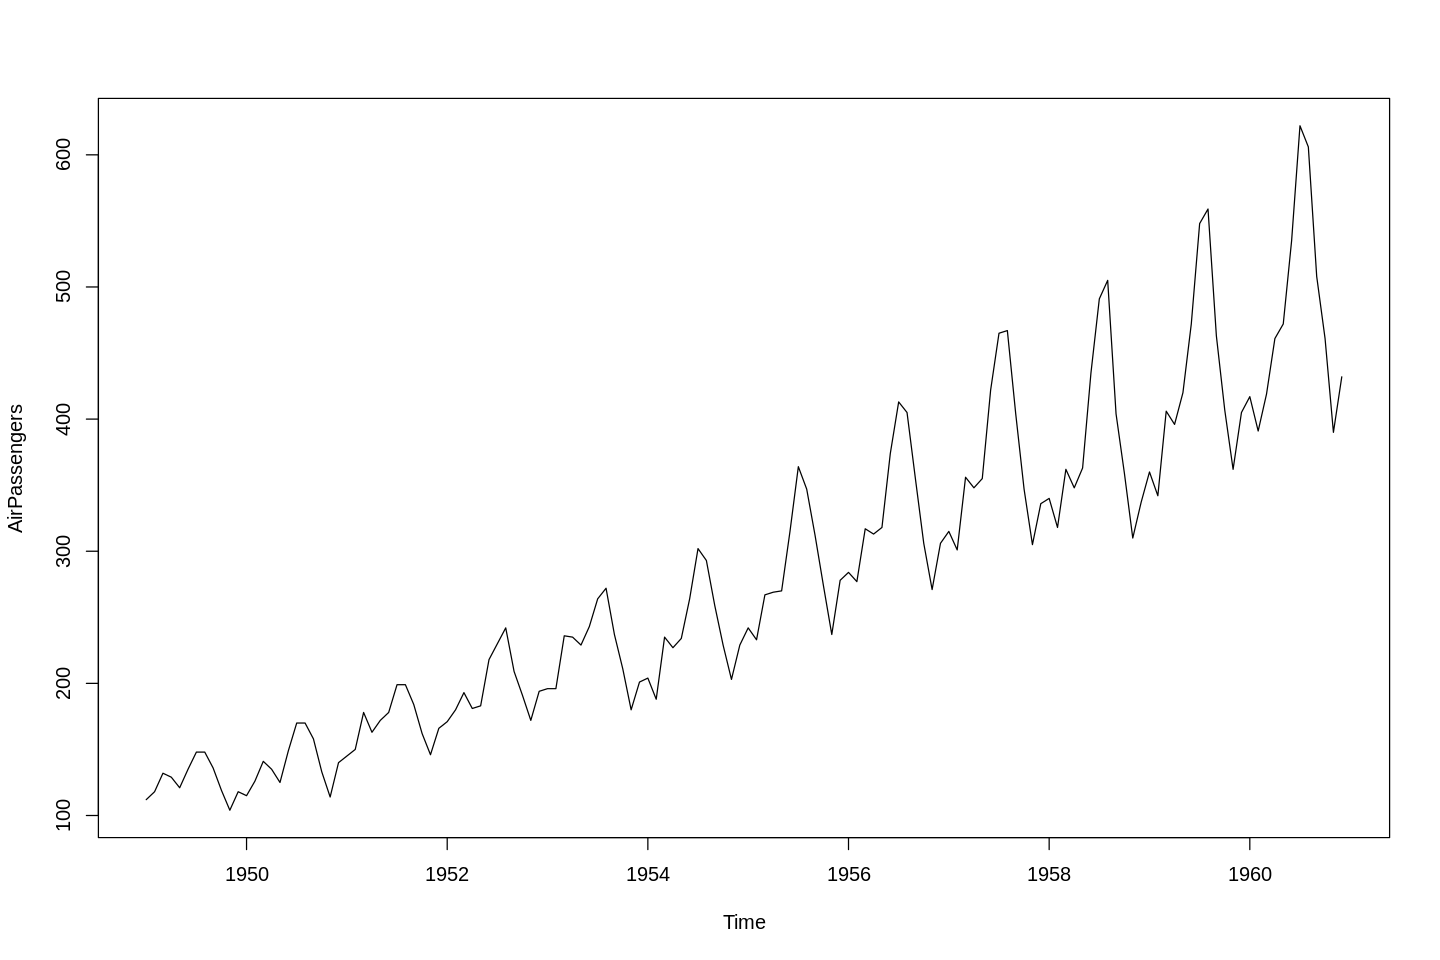

In [ ]:
#Plot the Dataset
options(repr.plot.width=12, repr.plot.height=8)
plot(AirPassengers)

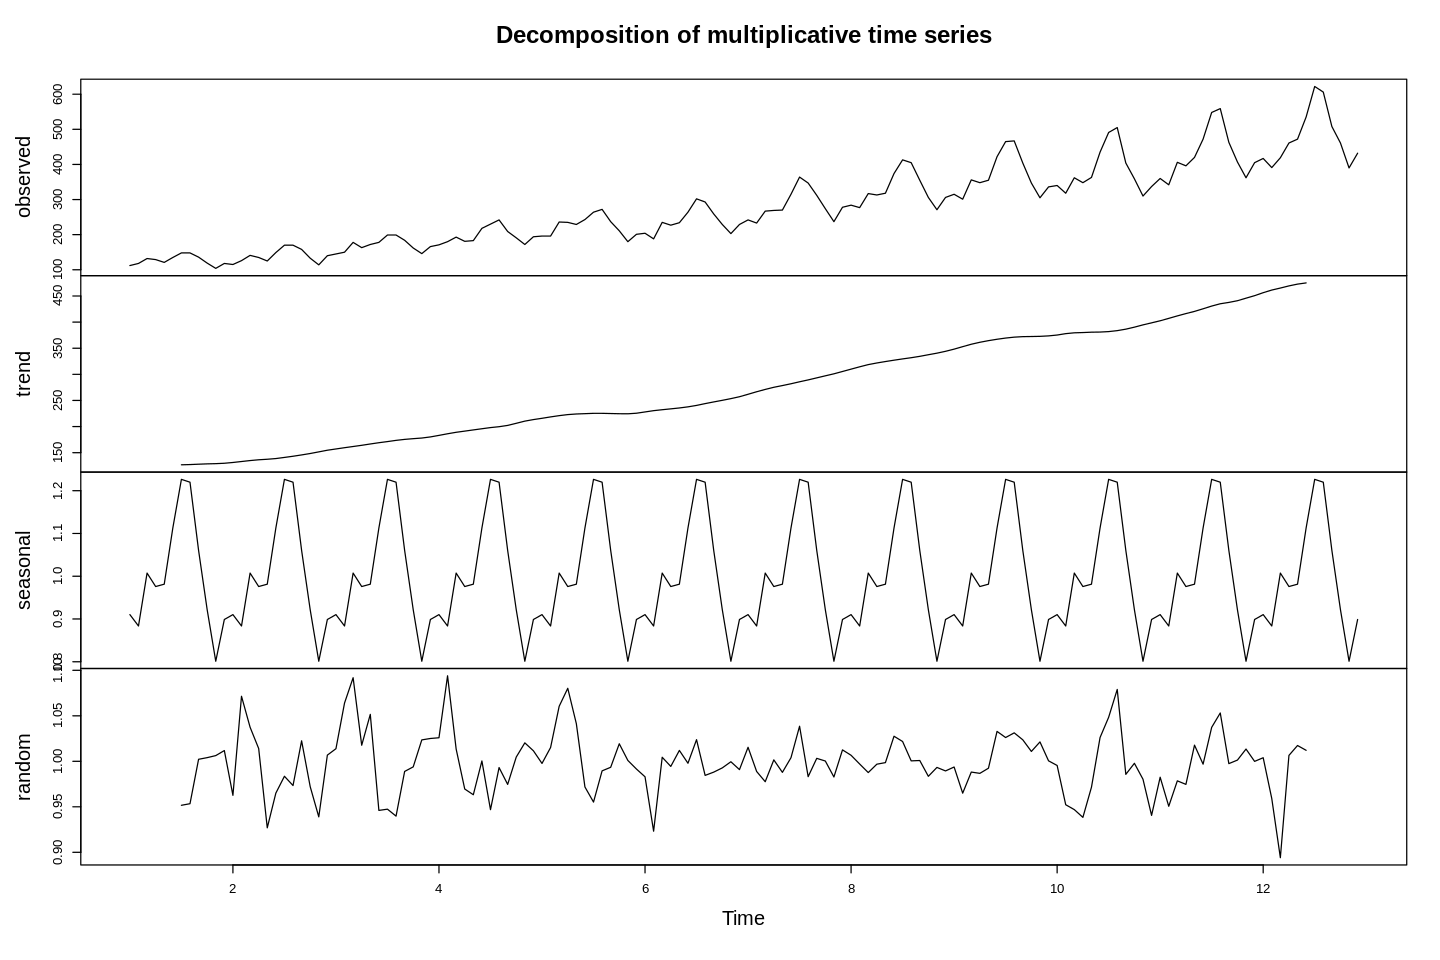

In [ ]:
#Decompose the Data Into Four Components
options(repr.plot.width=12, repr.plot.height=8)
tsdata <- ts(AirPassengers, frequency = 12) 

ddata <- decompose(tsdata, "multiplicative")

plot(ddata)

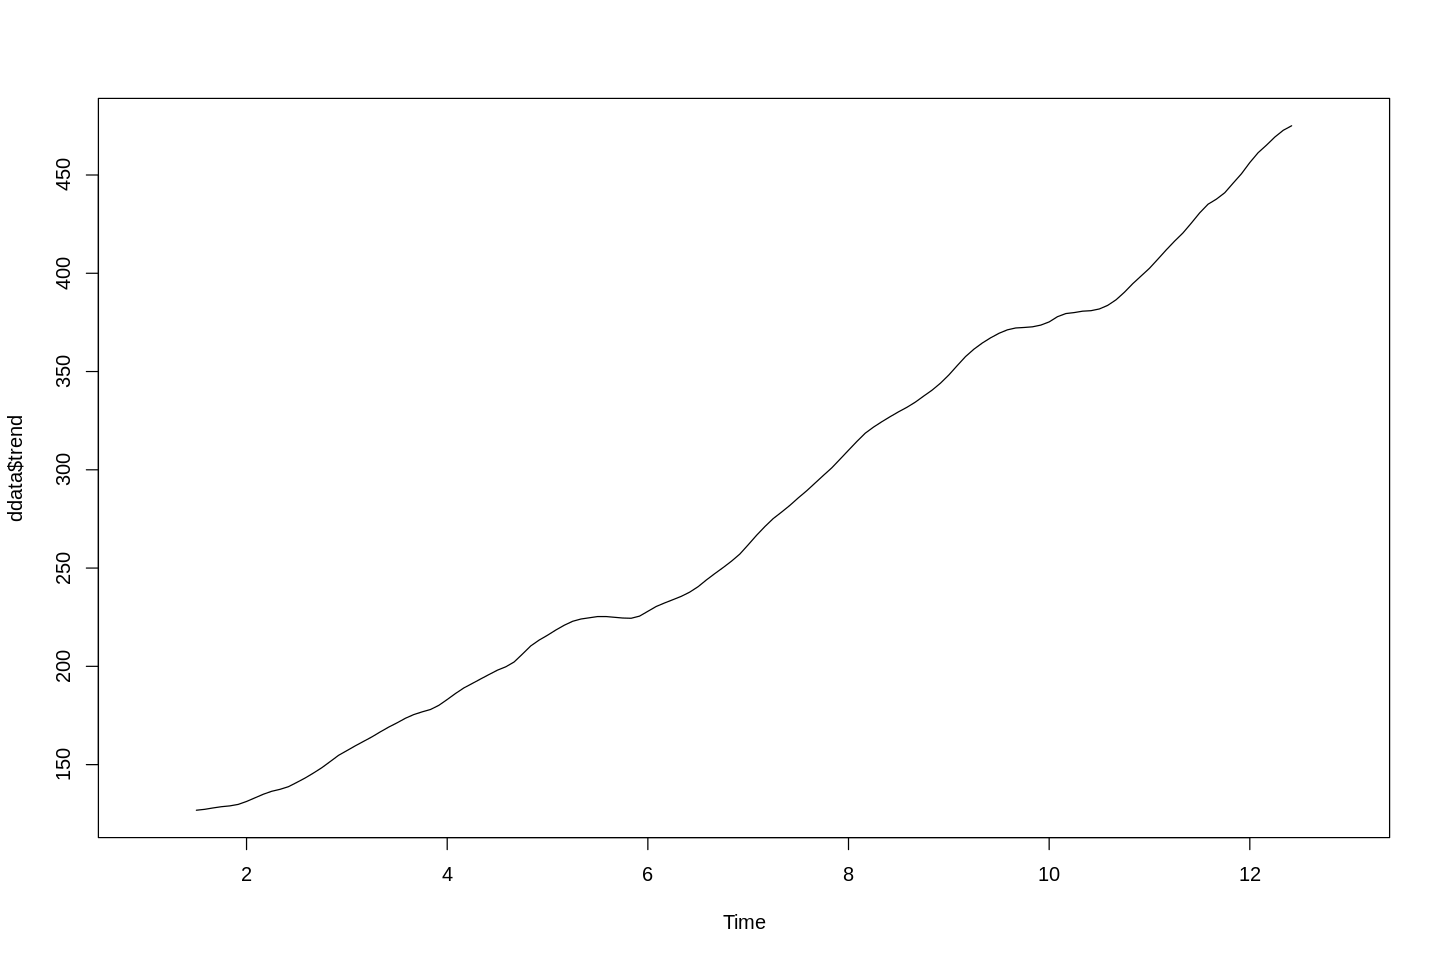

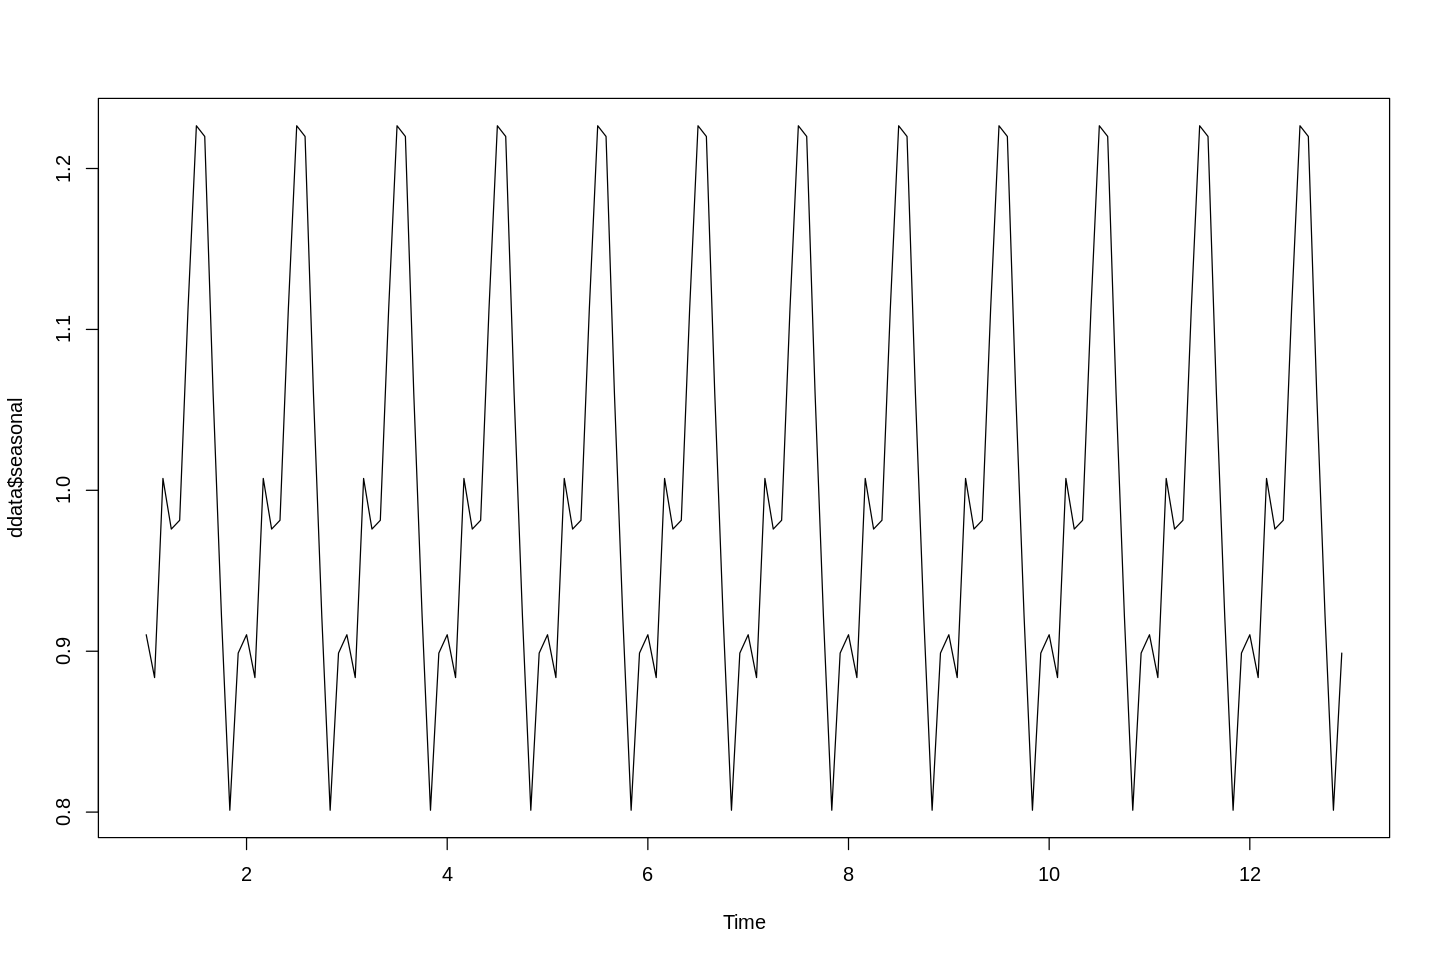

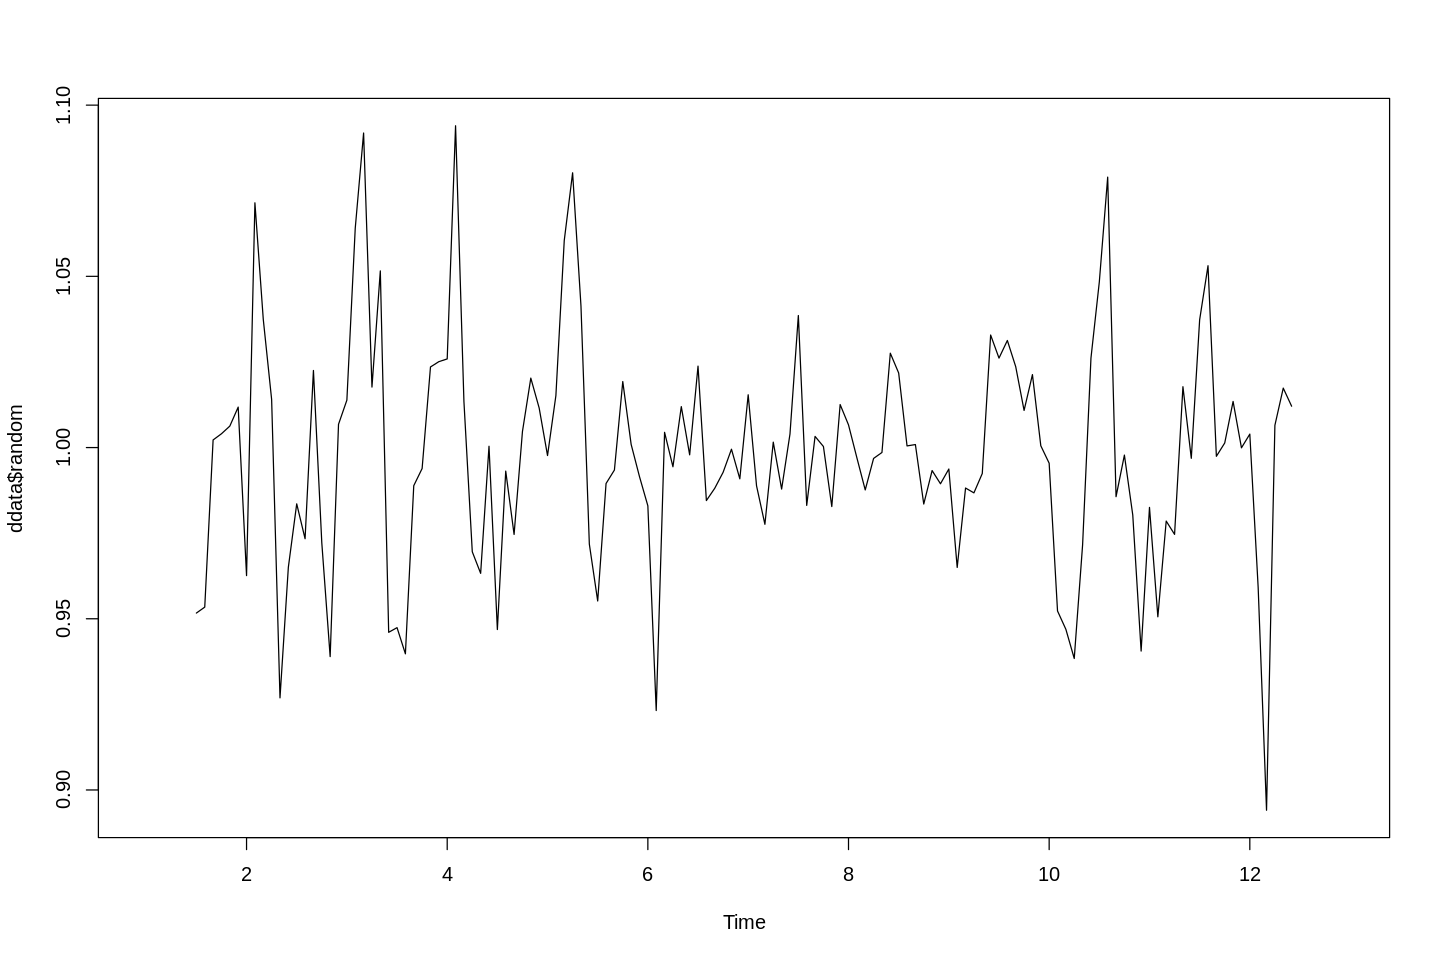

In [ ]:
#Plot the Different Components Individually
 options(repr.plot.width=12, repr.plot.height=8)
plot(ddata$trend)

plot(ddata$seasonal)

plot(ddata$random)

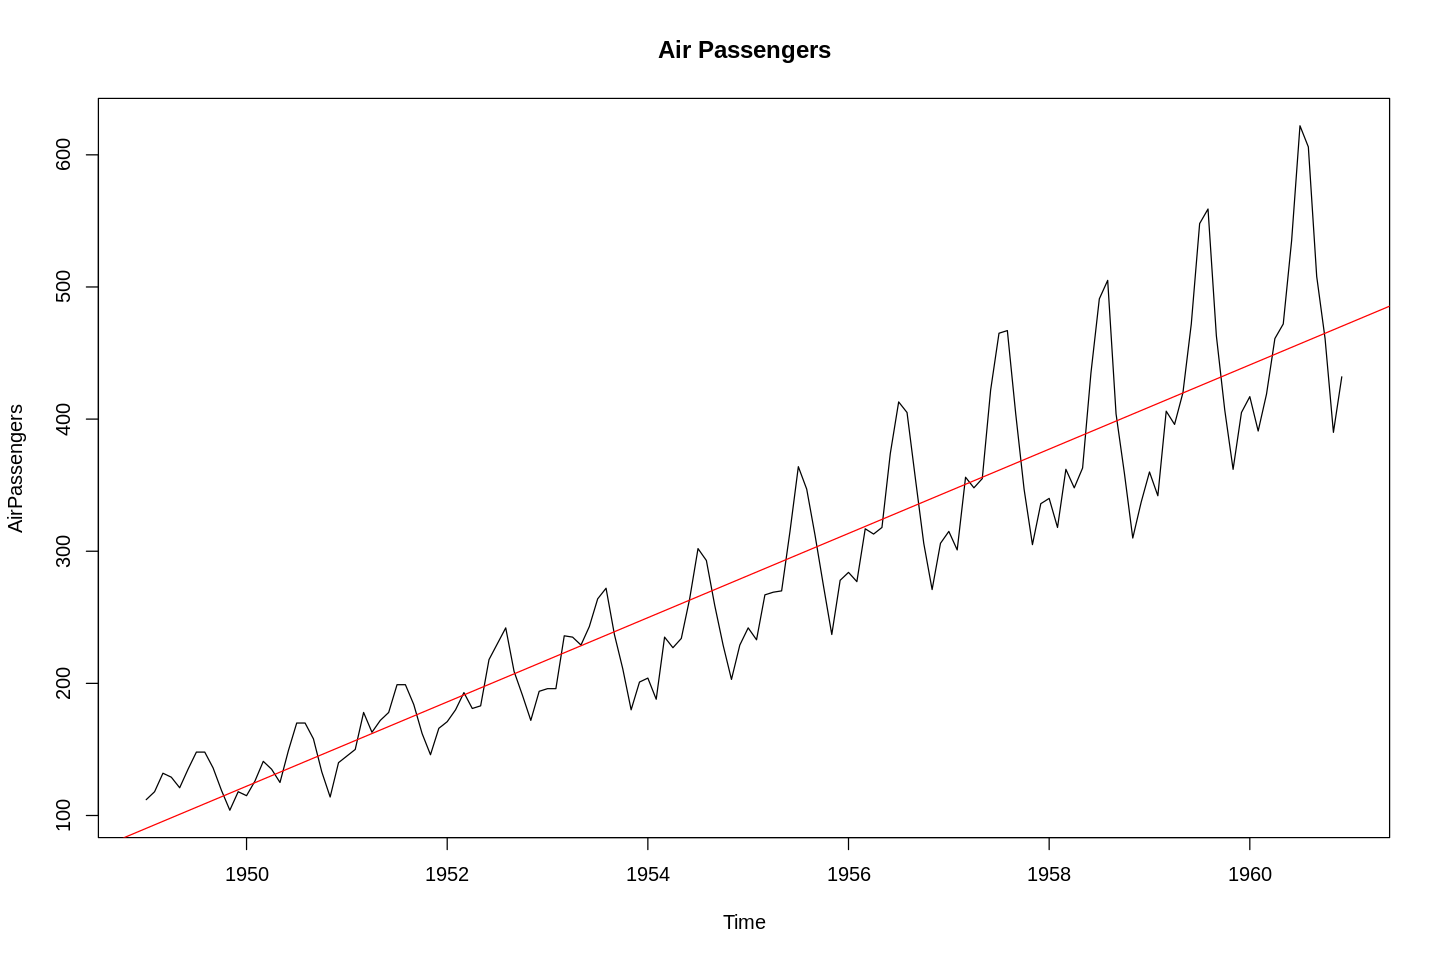

In [ ]:
#Plot a Trendline on the Original Dataset
options(repr.plot.width=12, repr.plot.height=8)
plot(AirPassengers, main="Air Passengers")
x=time(AirPassengers)
y=AirPassengers
# fitting linear regression model
linear_tend= lm(y~ x)
abline(linear_tend, col="red")

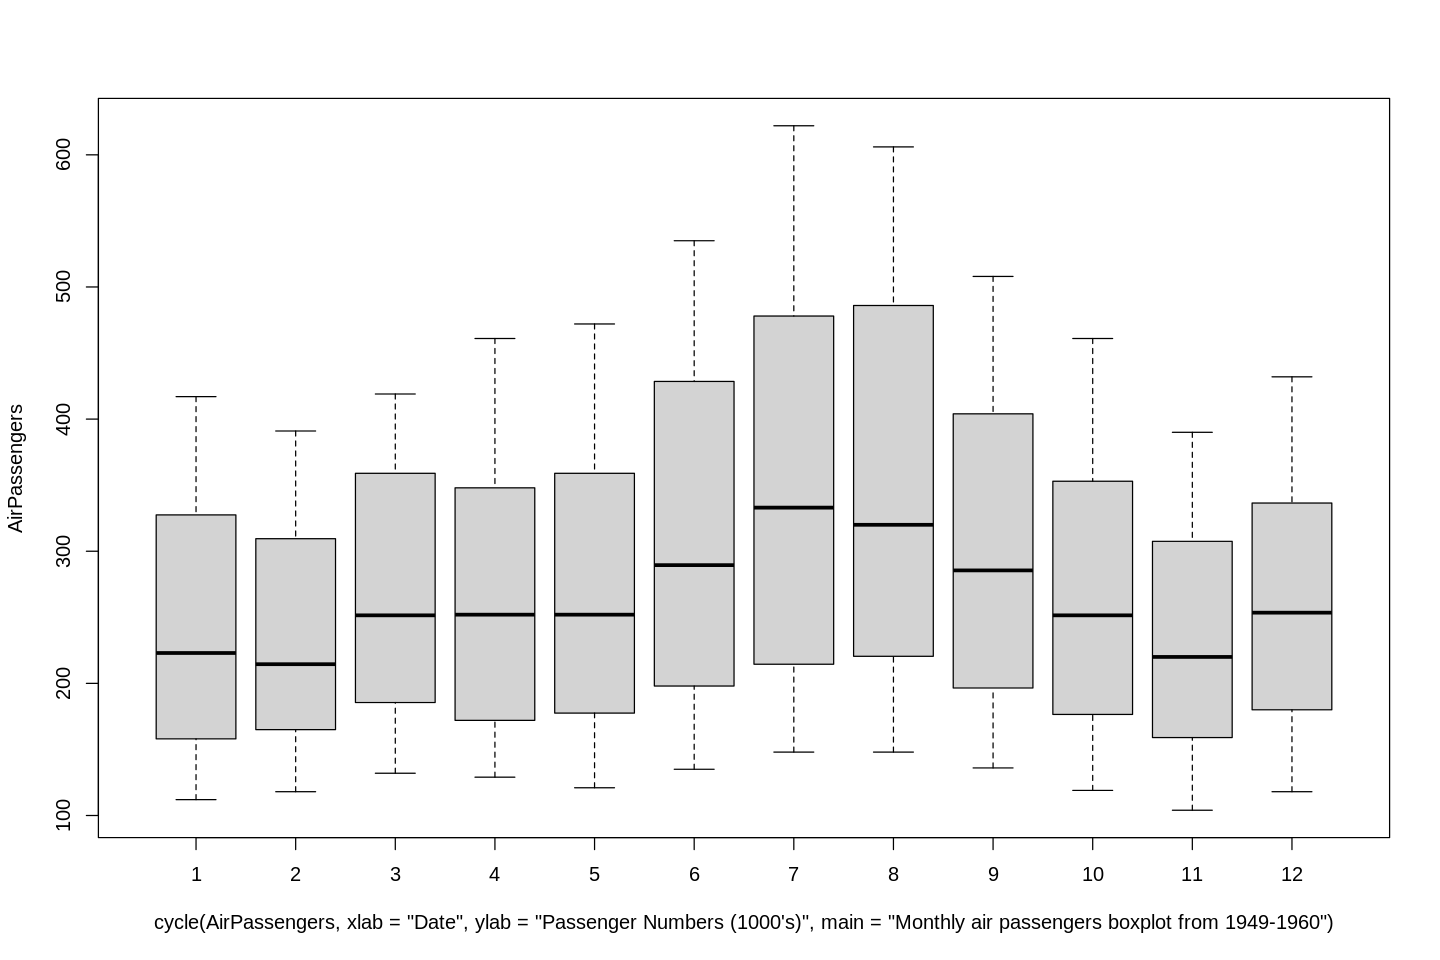

In [ ]:
#Create a Box Plot by Cycle
options(repr.plot.width=12, repr.plot.height=8)
boxplot(AirPassengers~cycle(AirPassengers, xlab="Date", ylab = "Passenger Numbers (1000's)", main = "Monthly air passengers boxplot from 1949-1960"))

From the above plot, you can see that the number of ticket sales goes higher in June, July, and August as compared to the other months of the years. 


In [ ]:

#Build the ARIMA Model Using auto.arima() Function
mymodel <- auto.arima(AirPassengers)

In [ ]:
mymodel

Series: AirPassengers 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 = 132.3:  log likelihood = -504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

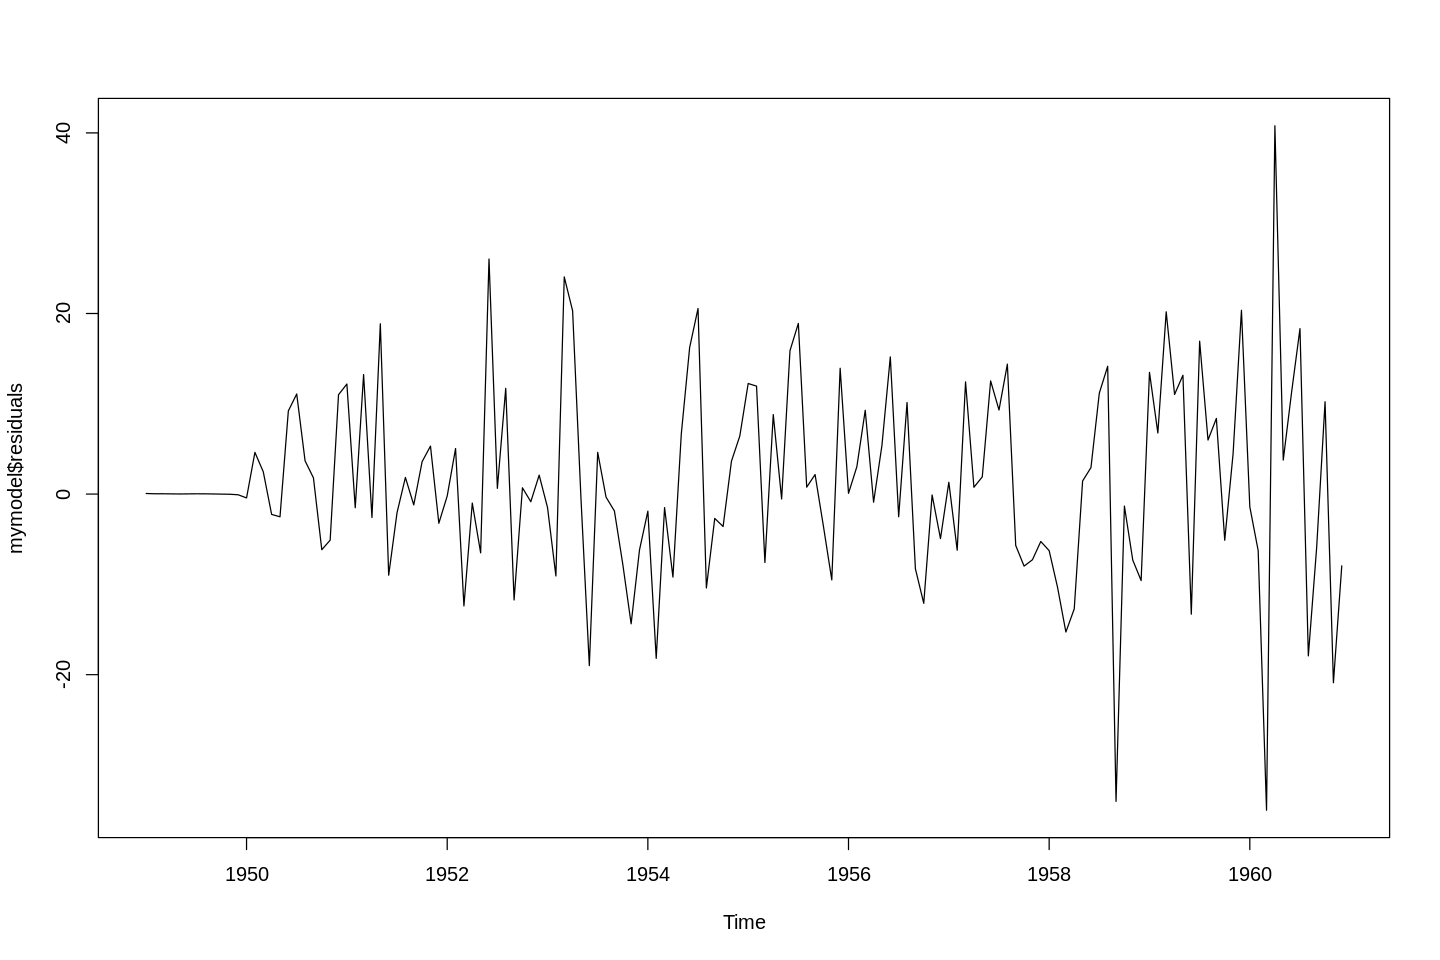

In [ ]:
plot.ts(mymodel$residuals)



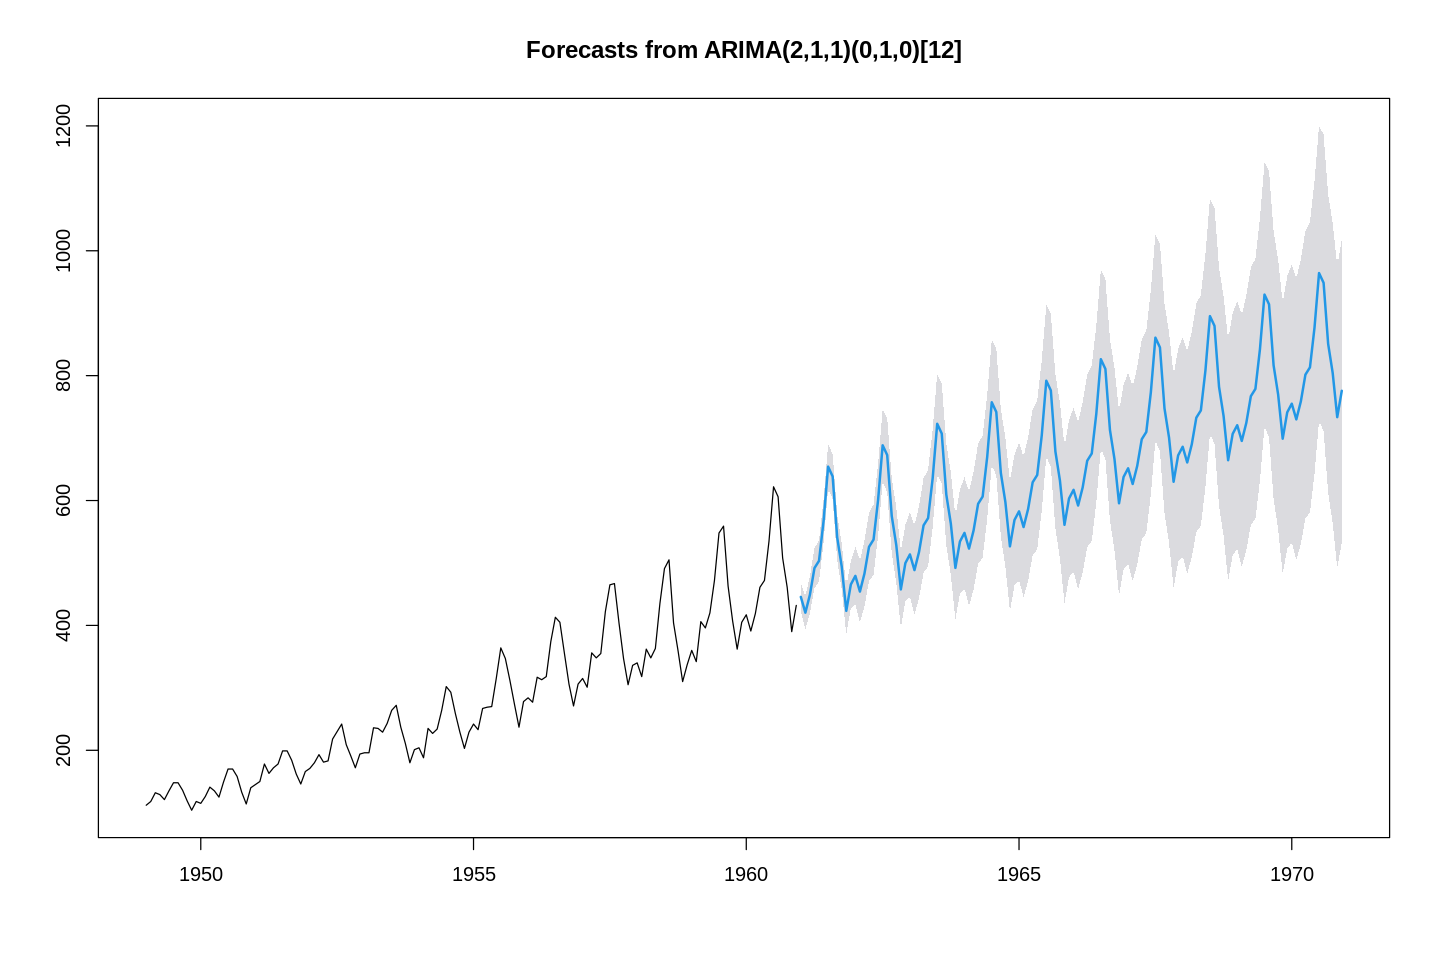

In [ ]:
#Forecast the Values for the Next 10 Years

myforecast <- forecast(mymodel, level=c(95), h=10*12)

plot(myforecast)

In [ ]:
myforecast

         Point Forecast    Lo 95     Hi 95
Jan 1961       445.6349 423.0851  468.1847
Feb 1961       420.3950 393.9304  446.8596
Mar 1961       449.1983 419.4892  478.9074
Apr 1961       491.8399 460.0092  523.6707
May 1961       503.3945 469.9953  536.7937
Jun 1961       566.8625 532.3007  601.4242
Jul 1961       654.2602 618.8122  689.7081
Aug 1961       638.5975 602.4630  674.7320
Sep 1961       540.8837 504.2081  577.5594
Oct 1961       494.1266 457.0177  531.2356
Nov 1961       423.3327 385.8715  460.7940
Dec 1961       465.5076 427.7556  503.2596
Jan 1962       479.2909 432.9629  525.6189
Feb 1962       454.1769 404.5359  503.8178
Mar 1962       483.0870 430.5492  535.6249
Apr 1962       525.8193 471.2101  580.4285
May 1962       537.4507 481.2244  593.6771
Jun 1962       600.9840 543.4927  658.4752
Jul 1962       688.4371 629.9331  746.9410
Aug 1962       672.8214 613.4940  732.1488
Sep 1962       575.1475 515.1393  635.1557
Oct 1962       528.4242 467.8443  589.0041
Nov 1962   